Hey there everyone! This is my first ever dataset here on Kaggle and I am looking to share my insights on how I approach datasets using Pandas, Matplotlib and Seaborn. I have used the Pokemon dataset becasue I used to be a GIANT pokemon geek when I was a child. Let's begin!

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/kaggle/input/pokemon/Pokemon.csv')

In [2]:
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# DATA CLEANING

### The data has extra words infront of "Mega", let's remove them!

In [3]:
df['Name'] = df['Name'].str.replace('.*Mega', 'Mega', regex=True) # Delete all words before "Mega"
df.set_index('Name', inplace=True) # Set Name Column as Index

#### Let's check how it looks

In [4]:
df.head(5)

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False


### Now the data looks much better 

## Now let's answer some basic questions about the dataset


### What is the Pokemon Type with highest HP

In [5]:
highest_hp = df.groupby('Type 1')['HP'].mean()

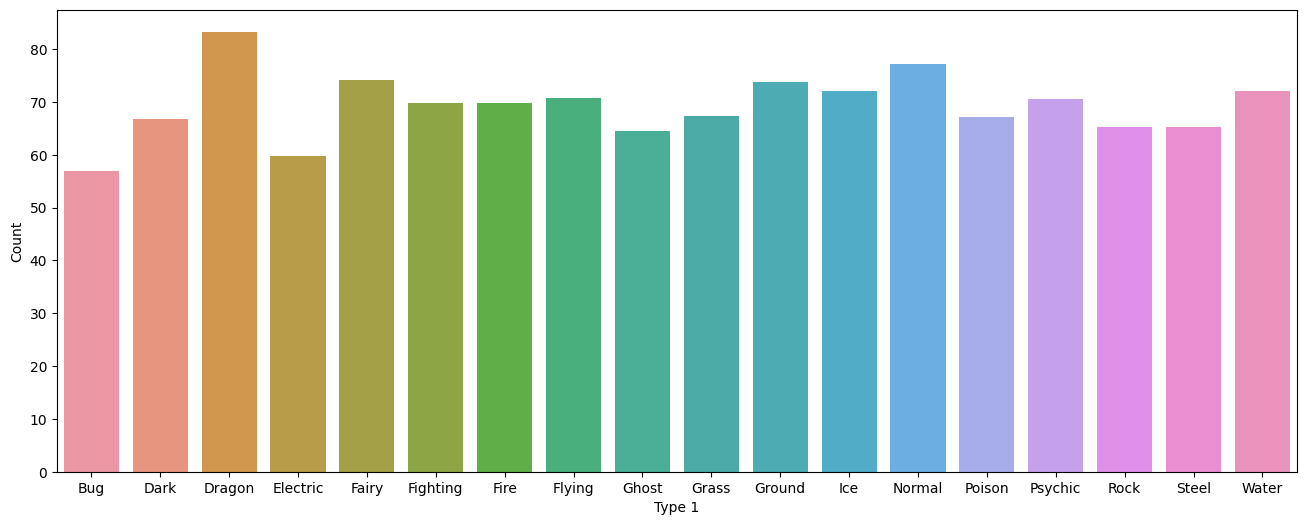

In [6]:
plt.figure(figsize=(16, 6), dpi=100)
sns.barplot(x=highest_hp.index,
            y=highest_hp.values)
plt.ylabel("Count")
plt.show()

#### So apparently the Normal Type Pokemon have the highest HP

### What Type of Pokemon is the Strongest

#### First we will create a Total column by adding all columns from index 4 to 9

In [7]:
df['Total'] = df.iloc[:, 4:10].sum(axis=1)
df_sorted = df.sort_values(by='Total', ascending=False)
average_totals = df.groupby('Type 1')['Total'].mean()

In [8]:
strongest_type = df.groupby('Type 1')['Total'].mean()

#### Then we'll display the result as a barchart 

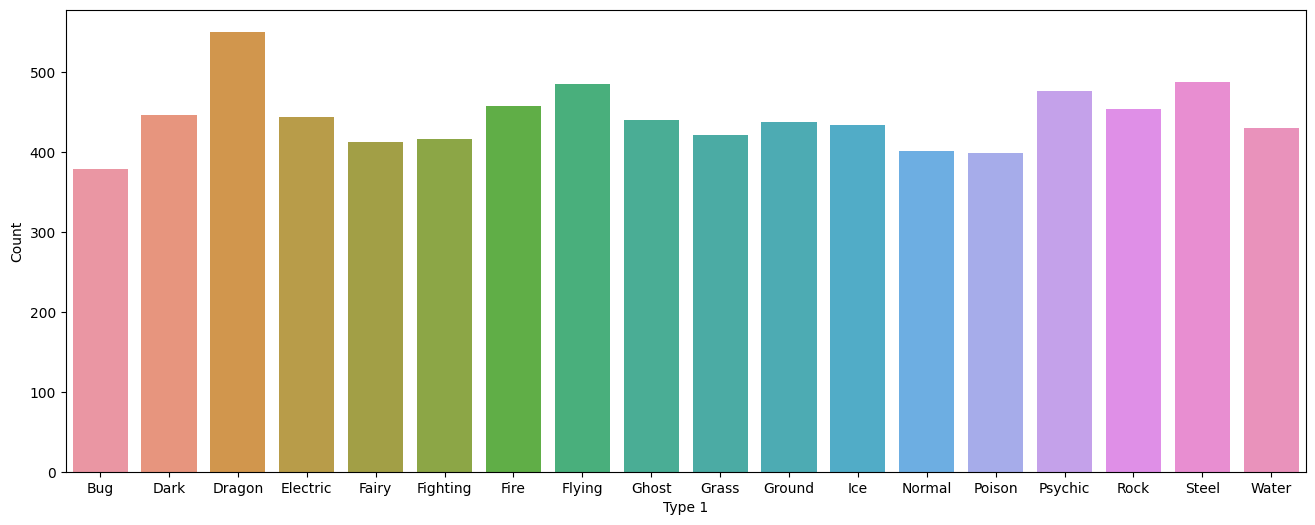

In [9]:
plt.figure(figsize=(16, 6), dpi=100)
sns.barplot(x=average_totals.index,
            y=average_totals.values)
plt.ylabel("Count")
plt.show()

#### We now know that the Dragon Type is the strongest Type of Pokemon

### Type of Pokemon with the highest attack

In [10]:
mean_attack = df.groupby('Type 1')['Attack'].mean()[:10]

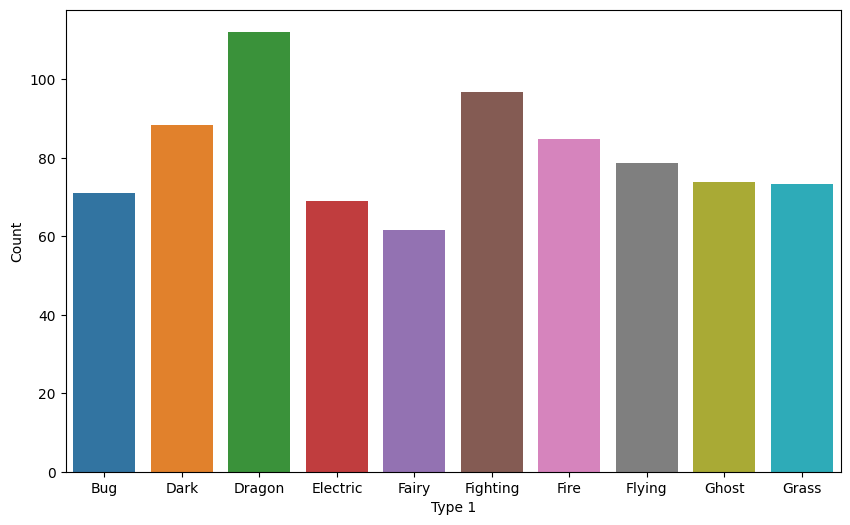

In [11]:
plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(x=mean_attack.index,
            y=mean_attack.values)
plt.ylabel("Count")
plt.show()

#### So the dragon type also has the highest mean attack

### Propotion of Pokemon according to Type

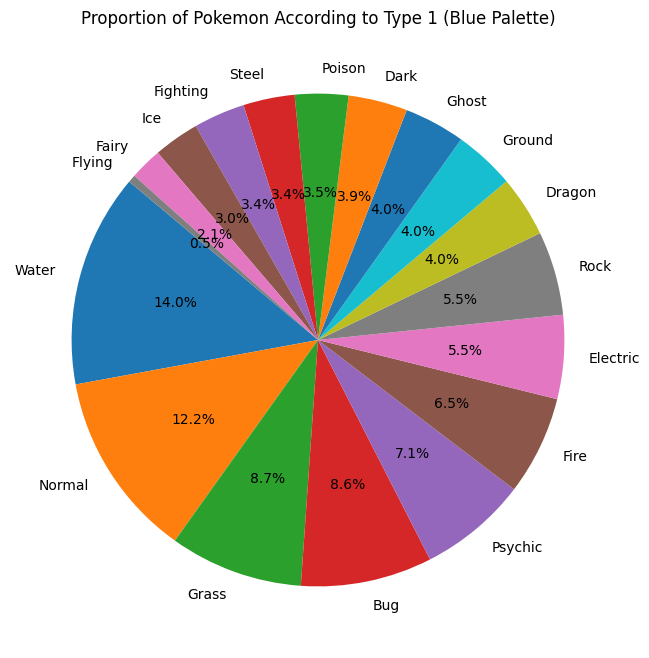

In [12]:
type_proportions = df['Type 1'].value_counts(normalize=True)

plt.figure(figsize=(8, 8))
plt.pie(type_proportions, labels=type_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Pokemon According to Type 1 (Blue Palette)')
plt.show()

### What is the Type with Highest Amount 

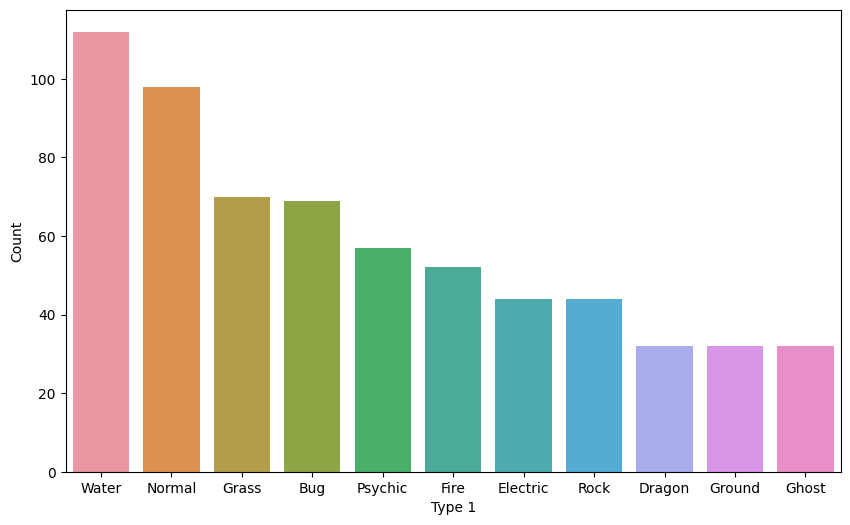

In [13]:
type_value_counts = df["Type 1"].value_counts()[:11]

plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(x=type_value_counts.index,
            y=type_value_counts.values)
plt.ylabel("Count")
plt.show()

#### Now we know that the most pokemon are in the Water Type category

### What is the strongest generation?

In [14]:
strongest_gen = df.groupby('Generation')['Total'].mean()
strongest_gen = strongest_gen.sort_values(ascending=False)

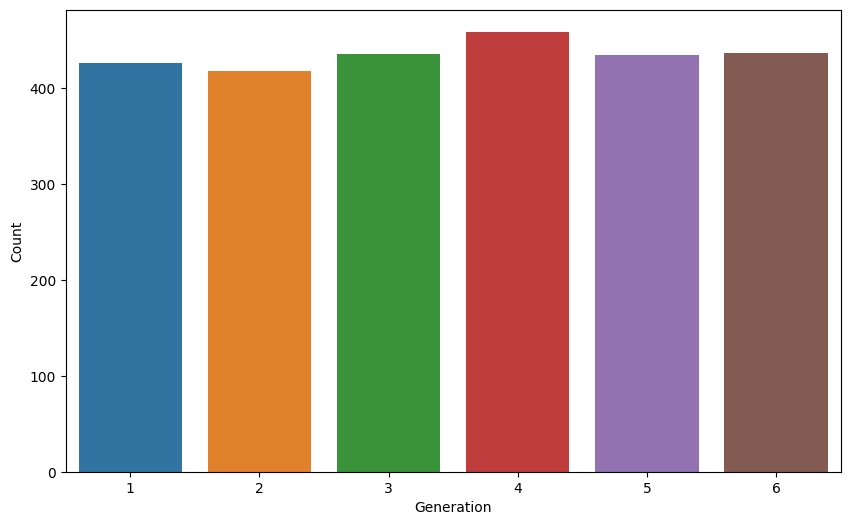

In [15]:
plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(x=strongest_gen.index,
            y=strongest_gen.values)
plt.ylabel("Count")
plt.show()

#### So the strongest generation is the 4th Generation

### What is the mean Total of Legendary Types?

In [16]:
df[df['Legendary'] == True]['Total'].mean()

637.3846153846154

### Legendary vs Non-Legendary Mean

<Axes: xlabel='Legendary', ylabel='Total'>

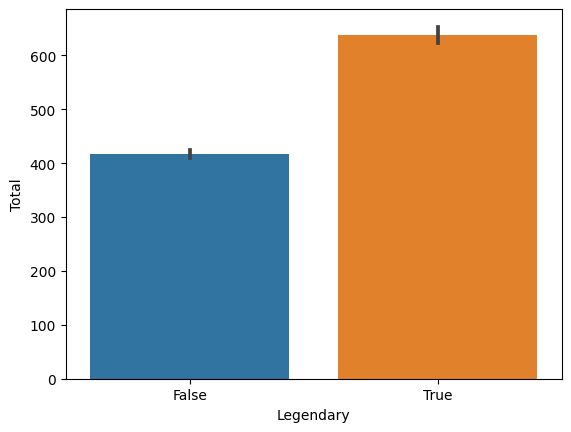

In [17]:
sns.barplot(x="Legendary", y="Total", data=df)

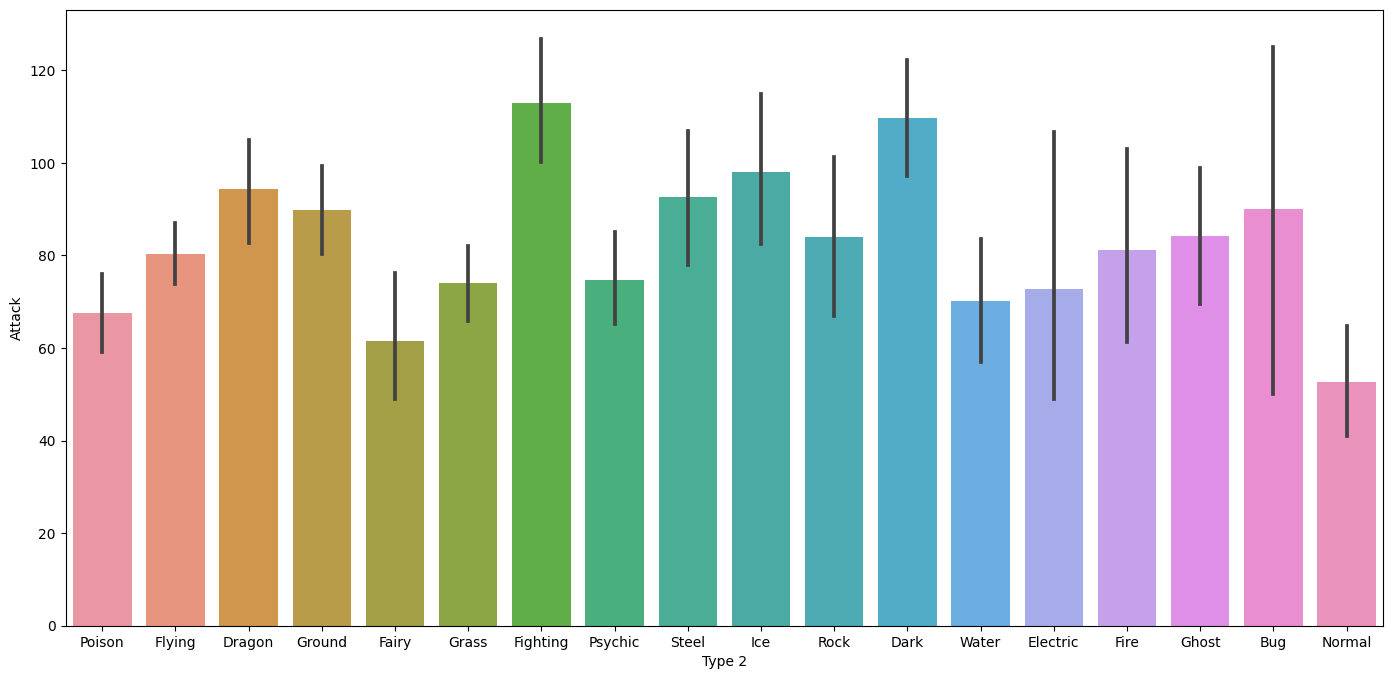

In [18]:
plt.figure(figsize=(17, 8)) 
sns.barplot(x='Type 2', y='Attack', data=df)
plt.show()